In [1]:
!pip install yfinance

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import numpy as np
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc

In [3]:
def getReturns(stocks, start, end):
    data = yf.download(stocks, start, end)['Close']
    return data

In [4]:
def getCovMtrx(assets:dict, start, end):
    for variety in assets.keys():
        data= getReturns(assets[variety][0], start, end)
        returns= data.pct_change()*100
        Cov=returns.cov()
        assets[variety]=Cov
    return assets

In [5]:
def graph(Cov_space):
    for variety in Cov_space:
        ax = sns.heatmap(Cov_space[variety], cbar=True)
        plt.title(str(variety))
        plt.show()


[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed


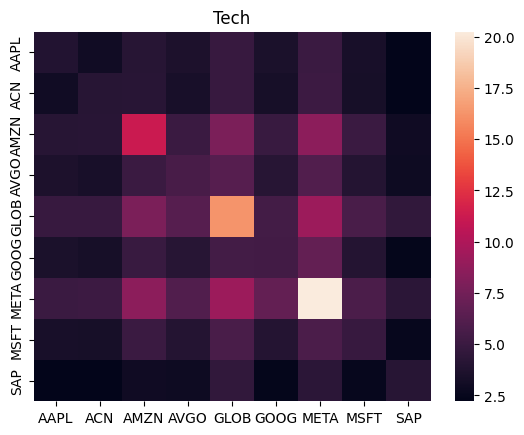

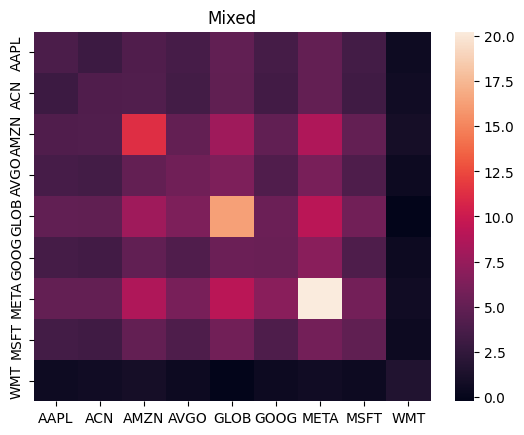

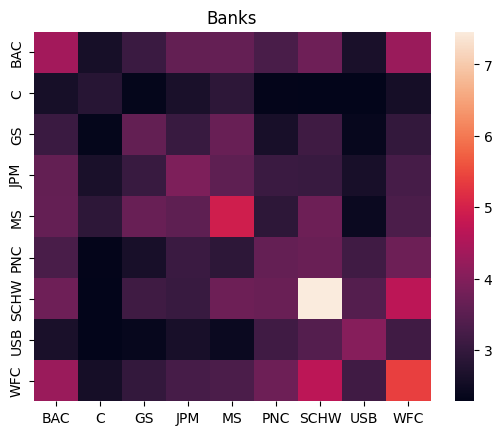

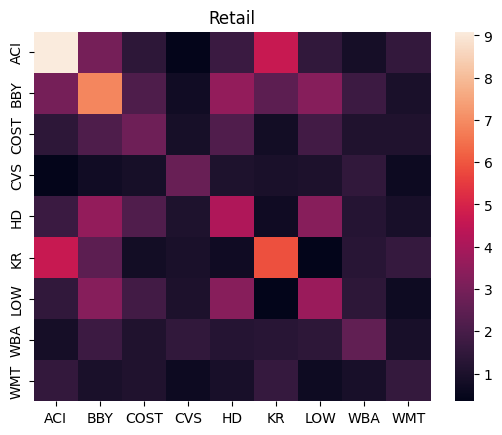

In [6]:
assets={"Tech":["AAPL MSFT GOOG AMZN META AVGO SAP ACN GLOB"],
        "Mixed":["AAPL MSFT GOOG AMZN META AVGO ACN GLOB WMT"],
        "Banks":["JPM BAC WFC SCHW MS GS C USB PNC"],
        "Retail":["WMT COST HD KR WBA CVS LOW ACI BBY"]  }
start="2022-01-01"#date:yyyy-mm-dd
end="2022-04-30"
Cov_space=getCovMtrx(assets, start, end)
graph(Cov_space)